In [90]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os

<div class="alert alert-block alert-danger">
## *Xue Kang* <-----

***

# Homework Assignment \#3

*due Thursday, March 6th, 2018 at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homework_03.ipynb``` file as a template and write the answers in text and include relevant code below each question. Print this document, double-sided, staple it, and hand it in on Thursday, March 6th, 2018, at 12.45pm at the beinning of class.  

### Question 1

*Preamble to Question #1*

In [50]:
faithfulData = sm.datasets.get_rdataset("faithful")
df_faithfulData = pd.DataFrame(faithfulData.data)

***

The `faithful` data set consists of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA. Regress `waiting` on `eruptions` and evalute the model in totality, i.e., evaluate the quality of the model, citing specific metrics, as well as validating necessary assumptions for the normal error regression model. Discuss, in detail, your approach and your evaluation of the model. Include all appropriate graphs *and*, if hypothesis tests are run, be certain to include all test details (null and alternative hypotheses, decision rules, $p$-values and conclusions).

**(1) generate a scatter plot, plot the estimated regression function and verify the linearity of the relationship:**  
According to a visually check of the scatter plot below, there are two dense clusters of data points locating in the eruptions range of 1.5 ~ 2.5 and 3.7 ~ 4.9, and a sparse data points locating in the range of 2.8 ~ 3.6, however, it can be observed that the overall scattering of the data points falls between two parallel lines around the fitting line. 

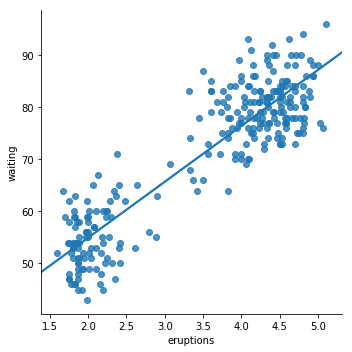

In [51]:
weplot = sns.lmplot("eruptions", "waiting", data=df_faithfulData, ci = None)

**(2) Print the regression summary, p_value of the test for $\beta_1$, SSE, SSR **   
Noticing that R-squared = 0.811 which is high enough to indicate the quality of our model.  
However, more evidence is needed to evaluate the model. 
From the regression result, we have $b_1 = 10.7296$ with corresponding $p\_value = 8.129959e-100 < 0.05$, which means we can reject the Null hypothesis $H_0 : β1 = 0$, thus we conclude there is sufficient evidence to say that there is a linear relationship in the population between the eruptions and waiting.  

In [52]:
faithfulOLSmodel = sm.OLS.from_formula('waiting ~ eruptions', df_faithfulData).fit()
print(faithfulOLSmodel.summary())
print("The coefficients and their associated p-values:")
print(faithfulOLSmodel.params)
print(faithfulOLSmodel.pvalues)

                            OLS Regression Results                            
Dep. Variable:                waiting   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          8.13e-100
Time:                        22:47:34   Log-Likelihood:                -868.38
No. Observations:                 272   AIC:                             1741.
Df Residuals:                     270   BIC:                             1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4744      1.155     28.985      0.0

**(3) Print the ANOVA table and examine F value with F_pvalue**  
Conduct a F-test for the slope parameter $\beta_1$:  
The null hypothesis is $H_0: \beta_1 = 0$.  
The alternative hypothesis is $H_a: \beta_1 \neq 0$.  
The test statistic is $F^*=MSR/MSE$.  
The $Fvalue = 1162.062638$ with the $F\_pvalue = 8.129959e-100 << \alpha$, thus we reject the null hypothesis of $H_0: \beta_1 = 0$, and conclude that there is a linear relationship in the population between the eruptions and waiting.   
Besides, SSR = 40643.730601, SSE = 9443.387046, MSR = 40643.730601, MSE = 34.975508, as we want the MSR to be big and the MSE to be small, so the relative values between MSR and MSE also indicate this model is a good fit.

In [65]:
print(sm.stats.anova_lm(faithfulOLSmodel, typ = 1))

              df        sum_sq       mean_sq            F         PR(>F)
eruptions    1.0  40643.730601  40643.730601  1162.062638  8.129959e-100
Residual   270.0   9443.387046     34.975508          NaN            NaN


/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


**(4) Based on the observation of scatter plot, it could be helpful to do a Brown-Forsythe test on residuals Homoskedasticity:**  
First, plot the residual ~ pridictor X and residual ~ fitted values $\hat{Y}$, it can be ovserved from the residula plots that the errors are randomly distributed.  
Run Brown-Forsythe test to check for homoscedasticity.  
$H_0: \sigma^2_{eruptions <= 3.25} = \sigma^2_{eruptions > 3.25}$  
$H_1: \sigma^2_{eruptions <= 3.25} \neq \sigma^2_{eruptions > 3.25}$   
We got a p-value of 0.84 which is greater than 0.05 or the 5% significance level. We don't have enough evidence to reject the null hypothesis. Given the data we have, we can conclude that variance of errors is constant.

[Text(0,0.5,'Residuals (e)'), Text(0.5,0,'eruptions(X)')]

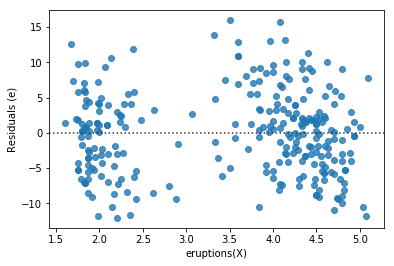

In [66]:
r1 = sns.residplot('eruptions', 'waiting', data = df_faithfulData)
r1.set(xlabel='eruptions(X)', ylabel='Residuals (e)')

[Text(0,0.5,'Residuals (e)'), Text(0.5,0,'Predicted Values (Y_hat)')]

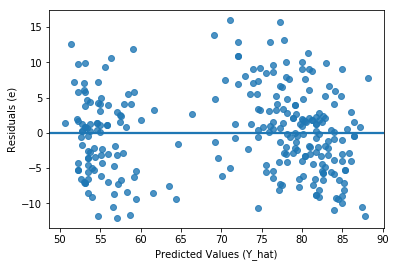

In [67]:
my_x = pd.Series(faithfulOLSmodel.predict())
my_y = pd.Series(faithfulOLSmodel.resid)
myDF_resid = pd.DataFrame(pd.concat([my_x.rename('predictedValues'),
my_y.rename('residuals')], axis = 1))
r2 = sns.regplot('predictedValues', 'residuals', data = myDF_resid, ci = False)
r2.set(xlabel='Predicted Values (Y_hat)', ylabel='Residuals (e)')

In [68]:
import scipy as sp
sample_1 = faithfulOLSmodel.resid[df_faithfulData.eruptions <= 3.25]
sample_2 = faithfulOLSmodel.resid[df_faithfulData.eruptions > 3.25]
sp.stats.levene(sample_1, sample_2, center = 'median')

LeveneResult(statistic=0.04059608951381479, pvalue=0.8404712927821396)

### Question 2

In 1987, Phillip Ein-Dor and Jacob Feldmesser estimated the relative performance (ERP, #10 in data dictionary) of CPUs in an academic journal paper using linear regression. Import `erpData.csv`, using `header = None` as there is no header in the file. The data dictionary follows:

1. Vendor Name
2. Model Name
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

    (a) Create a correlation matrix or scatterplot matrix of variables 3-10. Identify three explanatory variables you believe would be good predictors of ERP.
    
    (b) Run three simple linear regression models: $X_1 \sim Y$, $X_2 \sim Y$, and $X_3 \sim Y$. Discuss the merits of each model with supporting evidence, and choose the model which you feel is the most appropriate in predicting ERP.

In [80]:
erpData = pd.read_csv("erpData.csv",header=None)
# erp_numData = erpData.iloc[:,2:]
# erp_numData.corr()
erpData_clean = erpData.rename(columns = { 
                        2:'MYCT',
                        3:'MMIN',
                        4:'MMAX',
                        5:'CACH',
                        6:'CHMIN',
                        7:'CHMAX',
                        8:'PRP',
                        9:'ERP'})
erpData_clean.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


In [89]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(erpData_clean.iloc[:,:], alpha=0.2, diagonal='kde')

**According to the result of correlation matrix and scatter matrix, MMIN, MMAX and PRP have the highest correlation values with ERP, respectively 0.819292, 0.901202, and 0.966472. However, it is also noticed from the matrix that PRP and MMAX have a correlation value of 0.863004 which is pretty high,plus PRP has high correlation values with other varialbes as well, so it could be a hint that PRP has too much collinearity with other variables in this data set and we might not want to use it as a predictor of EPR; thus, we can select CACH as another potential candidates of valid predictor, however, we still need further investigations on these variables to make conclusion.**  
**So, next step is regression Y on each X to see the result diagnostics.**

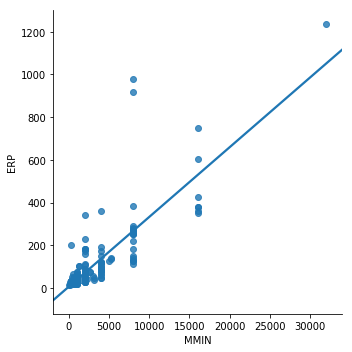

In [82]:
plot1 = sns.lmplot("MMIN", "ERP", data=erpData_clean, ci = None)

In [93]:
erpOLSmodel = sm.OLS.from_formula('ERP ~ MMIN', erpData_clean).fit()
print(erpOLSmodel.summary())
print(sm.stats.anova_lm(erpOLSmodel, typ = 1))

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     422.6
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           6.70e-52
Time:                        01:19:42   Log-Likelihood:                -1233.6
No. Observations:                 209   AIC:                             2471.
Df Residuals:                     207   BIC:                             2478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5795      7.658      0.729      0.4

/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The regression result of ERP on MMIN shows that $R^2 = 0.671$, with significant p-value of $\beta_1$ as well as F-statistic, we can conclude that there exist a weak linear relationship between MMIN and ERP, but MMIN is not most suitable predictor when it comes to estimate ERP.

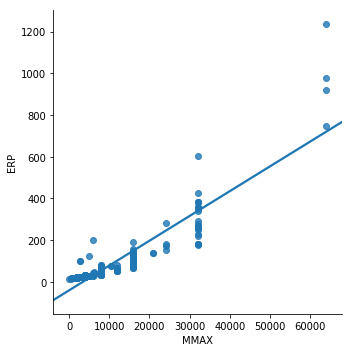

In [84]:
plot1 = sns.lmplot("MMAX", "ERP", data=erpData_clean, ci = None)

In [85]:
erpOLSmodel = sm.OLS.from_formula('ERP ~ MMAX', erpData_clean).fit()
print(erpOLSmodel.summary())
print(sm.stats.anova_lm(erpOLSmodel, typ = 1))

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     895.0
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           4.21e-77
Time:                        22:50:13   Log-Likelihood:                -1175.1
No. Observations:                 209   AIC:                             2354.
Df Residuals:                     207   BIC:                             2361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.9650      6.604     -6.203      0.0

/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The regression result of ERP on MMAX shows that $R^2 = 0.812$, which is relatively higher than the previous model, and the p-value of $\beta_1$ and F-statistic are significant, we can use MMAX as the appropriate predictor to predict ERP.

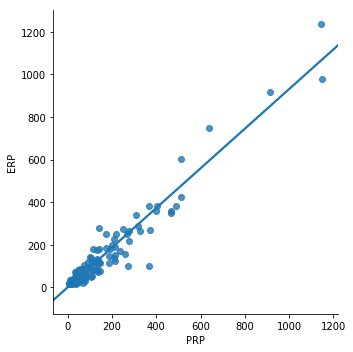

In [86]:
plot1 = sns.lmplot("PRP", "ERP", data=erpData_clean, ci = None)

In [87]:
erpOLSmodel = sm.OLS.from_formula('ERP ~ PRP', erpData_clean).fit()
print(erpOLSmodel.summary())
print(sm.stats.anova_lm(erpOLSmodel, typ = 1))
print("SSE = {}".format(erpOLSmodel.ssr))

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     2933.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          3.43e-124
Time:                        22:50:16   Log-Likelihood:                -1065.7
No. Observations:                 209   AIC:                             2135.
Df Residuals:                     207   BIC:                             2142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1045      3.299      0.335      0.7

/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The regression result of ERP on PRP has a high $R^2 = 0.934$, and the p-value of testing $\beta_1$ is significant, thus PRP could be a useful predictor. However, consider the high correlation of PRP with other variables, we should be very careful in including PRP into our model.

In [88]:
erpOLSmodel = sm.OLS.from_formula('ERP ~ CACH', erpData_clean).fit()
print(erpOLSmodel.summary())
print(sm.stats.anova_lm(erpOLSmodel, typ = 1))

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.45e-26
Time:                        22:50:17   Log-Likelihood:                -1292.8
No. Observations:                 209   AIC:                             2590.
Df Residuals:                     207   BIC:                             2596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.0560      9.618      3.853      0.0

/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


As for the potential predictor CACH, from the regression result we can see the R-squared value is low, so it is not a good predictor.

### Question 3

An OLS simple linear regression is run and the resulting model is

$$\ln(\hat{y}) = 12.63 - 3.3\ln(x)$$

Interpret the coefficient $b_1$, showing all math where appropriate.

**Taking the exponent of each side, we obtain: **   
$\hat{y} = e^{12.63 - 3.3ln(x)}$  
$\hat{y} = e^{12.63} * e^{-3.3ln(x)}$   
$\hat{y} = e^{12.63} * e^{ln(x^{-3.3})}$  
$\hat{y} = e^{12.63} * x^{-3.3}$  
**Thus we have $\beta_1 = e^{12.63}$**  

If we increase x by $1%$  
$ y = e^{12.63}(1.01 x)^{-3.3}$  
$ y = e^{12.63}(1.01)^{-3.3} x^{-3.3}$  
$ y = e^{12.63}(1.01)^{-3.3} x^{-3.3}$  
$ y = e^{12.63}(0.968) x^{-3.3}$

Therefore, an increase in the x by 1% will result in decrease
in y by 3.2% on average.

In [23]:
np.power(1.01, -3.3)

0.9676971600754156

### Question 4

An OLS multiple linear regression is run and the resulting model is

$$\hat{y} = -22.51 - 59x_1 + 445x_2 - x_3$$

Interpret the coefficients $b_1$, $b_2$ and $b_3$.

**From the model equation, $b_1 = -59$, $b_2 = 445$, $b_3 = -1$.**  
$b_1 = -59$, indicates that for each additional increase in $X_1$ of 1 unit, we expect y to decrease 59 unit on average, holding $X_2$ and $X_3$ constant.  
$b_2 = 445$, indicates that for each additional increase in $X_2$ of 1 unit, we expect y to increase 445 unit on average, holding $X_1$ and $X_3$ constant.  
$b_3 = -1$, indicates that for each additional increase in $X_3$ of 1 unit, we expect y to decrease 1 unit on average, holding $X_1$ and $X_2$ constant.  


### Question 5

Refer to the ERP data in Question 2. Generate a correlation matrix. Based solely on the correlation matrix and *without* running a MLR model, which three predictors would you select to include in an initial model. Support your decision with evidence.

In [53]:
erpData = pd.read_csv("erpData.csv",header=None)
# erp_numData = erpData.iloc[:,2:]
# erp_numData.corr()
erpData_clean = erpData.rename(columns = { 
                        2:'MYCT',
                        3:'MMIN',
                        4:'MMAX',
                        5:'CACH',
                        6:'CHMIN',
                        7:'CHMAX',
                        8:'PRP',
                        9:'ERP'})
erpData_clean.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


**According to the result of correlation matrix and scatter matrix, MMIN, MMAX and PRP have the highest correlation values with ERP, respectively 0.819292, 0.901202, and 0.966472. However, PRP has high correlation values with other varialbes as well, which means PRP has too much collinearity with other variables in this data set and we might not want to include PRP as a predictor of EPR; thus, we can select CACH as another potential candidates of valid predictor. So I will compare the regression result of regression ERP on MMIN+MMAX+PRP and regression PRP on MMIN+MMAX+CACH, then compare the diagnostic values to decide which set of variables to use. For this problem I will use ERP ~ MMIN + MMAX + PRP first, and then continue to eliminate or add new variables.**

In [54]:
erp_lm = smf.ols('ERP ~ MMIN + MMAX + PRP', data = erpData_clean).fit()
erp_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1439.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          2.09e-137
Time:                        22:47:56   Log-Likelihood:                -1026.5
No. Observations:                 209   AIC:                             2061.
Df Residuals:                     205   BIC:                             2074.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1027      3.419     -5.295      0.000     -24.843     -11.363
MMIN           0.0037      0.001      3.654      0.000       0.002       0.006
MMAX           0.0031      0.000      7.826      0.000       0.002       0.004
PRP            0.6627      0.031     21.160      0.000       0.601       0.724
==============================================================================
Omnibus:                       42.324   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.213
Skew:                           0.292   Prob(JB):                     3.81e-94
Kurtosis:                      10.004   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
erp_lm = smf.ols('ERP ~ MMIN + MMAX + CACH', data = erpData_clean).fit()
erp_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     492.9
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.96e-93
Time:                        22:47:57   Log-Likelihood:                -1129.7
No. Observations:                 209   AIC:                             2267.
Df Residuals:                     205   BIC:                             2281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.2554      5.359     -7.884      0.000     -52.822     -31.689
MMIN           0.0106      0.002      6.907      0.000       0.008       0.014
MMAX           0.0079      0.001     15.623      0.000       0.007       0.009
CACH           0.6976      0.113      6.164      0.000       0.474       0.921
==============================================================================
Omnibus:                      172.085   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3017.388
Skew:                           3.028   Prob(JB):                         0.00
Kurtosis:                      20.601   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results of regress `ERP` on `MMIN + MMAX + PRP` exceeds other regression schemas, so we can use `MMIN, MMAX, PRP` to predict `ERP`.

### Question 6

Using both math and words, explain the tradeoffs involved in the calculation of the Adjusted Coefficient of Multiple Determination ($R_a^2$), and how it differs from the Coefficient of Multiple Determination ($R^2$).

**Answer:**  
As we add more variables to the model, $R^2$ will never get smaller, as adding more variables to the model can only explain more error, not less.  
Examine the formula of $R^2$, $R^2 = \frac{SSR}{SSTO} = 1 - \frac{SSE}{SSTO}$, as SSE decreases, which occurs when adding additional variables, $R^2$ invariably increases.  

To offset the mathematical desire to include additional variables and increase the $R^2$ value, an alternative measure, the Adjusted Coefficient of Multiple Determination, $R^2_a$
is computed as $R^2_a = 1 - \frac{\frac{SSE}{1-p}}{\frac{SSTO}{n-1}} = 1 - (\frac{n-1}{n-p})\frac{SSE}{SSTO}$.  

The effect of adding an additional variable to the magnitude of $R^2_a$:  
when adding additional variable to the GLRM, $p\uparrow , n-p\downarrow , \frac{n-1}{n-p}\uparrow ,$ the entire item$(\frac{n-1}{n-p})\frac{SSE}{SSTO}\uparrow , 1-(\frac{n-1}{n-p})\frac{SSE}{SSTO}\downarrow$, which means $R^2_a$ decreases. 
on the other hand, when adding an additional variable to GLRM, $SSE\downarrow$, the fraction $(\frac{n-1}{n-p})\frac{SSE}{SSTO}\downarrow, 1-(\frac{n-1}{n-p})\frac{SSE}{SSTO}\uparrow$,which means $R^2_a$ increases.  
This trade off means that when adding variables to a model, the $R^2_a$ value can either go up or down.

### Question 7

Explain why we need to be cautious of extrapolations in MLR.

When estimating a mean response or predicting a new observation in multiple regression, we needs to be careful that the estimate ore prediction does not fall outside the scope of the model. The danger is that the model may not be appropriate when it is extended outside the region of the observations. In MLR, it is particularly easy to lose track of this region since the levels of $X_1,...X_{p-1}$ **jointly** define the region. Thus, one cannot merely look at the ranges of each predictor variable. When there are only two predictor variables, it is easy to spot the extrapolation of one dot which is within the ranges of X1 and X2 individually yet is well outside the joint region of observations. However, it becomes much more difficult when the number of predictor variables is large. So we need to be cautious of extrapolations in MLR.

### Question 8

Discuss the differences between Type 1 and Type 2 ANOVA Tables. 

**Answer:**  
Type I : Also called sequential ANOVA, as variables are sequentially added to the regression model. Because of the sequential nature and the fact that the two main factors are tested in a particular order, this type of sums of squares will give different results for unbalanced data depending on which main effect is considered first.   
Type II : For each variable, we get a test for adding one of the predictors to a model that includes all other variables. This type tests for each main effect after the other main effect. Note that no significant interaction is assumed (in other words, you should test for interaction first (SS(AB|A,B)) and only if AB is not significant, continue with the analysis for main effects).  
The Type I sums of squares add up to SSR, the regression sum of squares for the model containing all the independent variables. The Type I sums of squares are different
depending upon the way the independent variables are ordered.  
The Type II sums of squares don’t necessarily add up to SSR. The Type II sums of squares do not depend on the ordering of the independent variables.

### Question 9

Refer to the Figure on slide 333. Discuss the sequential nature of model building, using the Body Fat Example on the slide (data on course website if you would like to explore, but not necessary).

**Answer:**  
We can observe from the figure in slide 333 that SSR(X2|X1)=33.17 > SSR(X1|X2)=3.47, which indicates that the SSR of the model differs with the sequence we put predictor variables into the model. And according to the numeric magnitude of SSR(X2|X1) and SSR(X1|X2)=3.47, we can infer that X2 can better interpret the fraction of the sample variation in Y that is explained by X2. So if we need to eliminate one variable from the model, it is better to drop X1.

### Question 10

Using `bodyFat.txt`. Regress `bodyFat` ($Y$) on `tricep` ($X_1$) and `thigh` ($X_2$). Compute the coefficient of partial determination for $X_2|X_1$, i.e., $R_{YX_2|X_1}^2$. Interpret the result. 

 Since $R_{YX_2|X_1}^2 = \frac{SSE(X_1)-SSE(X_1,X_2)}{SSE(X_1)} = \frac{SSR(X_2|X_1)}{SSE(X_2)}$  
 so we can caculate $SSE(X_1)$ and $SSE(X_1,X_2)$, then use the above formula to get $R_{YX_2|X_1}^2$

In [56]:
bodyFatData = pd.read_table('bodyFat.txt',skipinitialspace=True, sep=' ')
#names=['tricep', 'thigh','midarm','bodyFat'],
bodyFat_lm = smf.ols('bodyFat ~ tricep + thigh',data = bodyFatData).fit()
SSE_X1_X2 = bodyFat_lm.ssr#SSE
print("SSE(X1,X2)={}".format(SSE_X1_X2))
bodyFat_X1 = smf.ols('bodyFat ~ tricep',data = bodyFatData).fit()
SSE_X1 = bodyFat_X1.ssr#SSE
print("SSE(X1)={}".format(SSE_X1))
#coefficient of partial determination
cpd = (SSE_X1 - SSE_X1_X2)/SSE_X1
print("the coefficient of partial determination for  X2|X1 = {}".format(cpd))

SSE(X1,X2)=109.95079033418062
SSE(X1)=143.11970316803615
the coefficient of partial determination for  X2|X1 = 0.2317564395372737


### Question 11

In the context of polynomial and interaction terms, discuss the hierarchical principle in model building and its implications.

**Answer: **  
When fitting polynomial regression models, statisticians will often fit the highest order model which they feel comfortable employing - typically a second or third order polynomial
regression model, and subsequently scale back, lowering powers to evaluate whether lower-order models are adequate.  
With the hierarchal approach, if a polynomial term of a given order is retained, then **all related terms of lower order** are also retained in the model.  
The same is true for interaction terms: keeping a significant interaction term in the model implies **keeping all related first-order predictor variables**.  
Implications: for example, in a cubic polynomial regression function where the cubic term is statistically significant, the quadratic term is also kept in the model, here the lower-order quadratic term is viewed as providing more **basic information** about the shape of the response function; the higher-order cubic term is viewed as providing **refinements** in the specification of the shape of the response function.  
More polynomial and interaction terms in the model will complicate the procedure of regression analysis when we use the partial derivative to predict Y with Xi. The hierarchical principle can help us to reduce this pain and cost of the model building.

### Question 12

*Preamble*

In [57]:
womenData = sm.datasets.get_rdataset("women") 
womenDF = pd.DataFrame(womenData.data)

Regress `height` on `weight` and determine whether a quadratic term is appropriate. If not, what about a cubic? Show results and provide evidence for you conclusions. Be sure to verify all modeling assumptions.

In [58]:
women_lm2 = smf.ols('height ~ weight + np.square(weight)', data = womenDF).fit()
print(women_lm2.summary())
print(women_lm2.ssr)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.732e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.12e-22
Time:                        22:48:15   Log-Likelihood:                 19.943
No. Observations:                  15   AIC:                            -33.89
Df Residuals:                      12   BIC:                            -31.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.7469      1.72

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


**Results of regress height on $weight^2$:**  
The $R^2$ is as high as 1, and all the p-values of coefficients are significant, the SSE are quite small. This could be a good fitted regression model. 

In [59]:
women_lm3 = smf.ols('height ~ weight + np.square(weight) + np.power(weight,3)', data = womenDF).fit()
print(women_lm3.summary())
print(women_lm3.ssr)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.690e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.00e-20
Time:                        22:48:17   Log-Likelihood:                 20.035
No. Observations:                  15   AIC:                            -32.07
Df Residuals:                      11   BIC:                            -29.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.8121    

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


**Results of regress height on $weight^3$:**   
Although the $R^2$ value is as high as 1, the p value for all the coefficients are greater than the significant level of 0.05, which means we do not reject the the null hyphthesis of $\beta_0 = \beta_1 = ... = \beta_{p-1} = 0$. Thus, this model is actually not a good fit to the problem of our dataset.
A polynomial model of sufficiently high order can always be found to fit data containing no repeat observations perfectly, and the model can become highly erratic for interpolations.

### Question 13

What is the difference between a *reinforcement* and *interference* interaction effect. Provide an eample of each.

Consider a regression model for two quantitative predictor variables with linear effects On Y and interacting effects of X1 and X2 on Y represented by a cross-product term:  
$Y_i=\beta_0+\beta_1X_{i1}+\beta_2X_{i2}+\beta_3X_{i1}X_{i2}+\epsilon_i$  
thus $E\{Y\}= \beta_0+\beta_1X_1 +\beta_2X_2 + \beta_3X_1X_2$

An example can be used to illustrate **reinforcement interaction effect** is:  
$E\{Y\}= 10 + 2X_1 + 5X_2 + 0.5X_1X_2$,the coefficient of the interaction term is positive,  
When $X_2 = 1$, the slope of response function is $\beta_1 + \beta_3X_2 = 2 + 0.5(1) = 2.5$;   
when $X_2 = 3$, the slope of response function is $\beta_1 + \beta_3X_2 = 2 + 0.5(3) = 3.5$;  
Thus, a **unit increase in X1** has **a larger effect on Y** when **X2 are at a higher level** than **when X2 are at a lower level**.A similar increase in the slope occurs if the response function against X2 is considered for higher levels of X1.   
When the regression coefficients $\beta_1$, and $\beta_2$ are positive, we say that the interaction effect between the two quantitative variables is of a **reinforcement** type when **the slope of the response function against one of the predictor variables increases for higher levels of the other predictor variable** (ie., when **$\beta_3$ is positive**).  

An example can be used to illustrate **interference interaction effect** is:  
$E\{Y\}= 10 + 2X_1 + 5X_2 - 0.5X_1X_2$,the coefficient of the interaction term is negative,  
When $X_2 = 1$, the slope of response function is $\beta_1 + \beta_3X_2 = 2 - 0.5(1) = 1.5$;   
when $X_2 = 3$, the slope of response function is $\beta_1 + \beta_3X_2 = 2 - 0.5(3) = 0.5$;  
Thus, a **unit increase in X1** has **a larger effect on Y** when **X2 are at a lower level** than **when X2 are at a higher level**.A similar increase in the slope occurs if the response function against X2 is considered for lower levels of X1.   
When the regression coefficients $\beta_1$, and $\beta_2$ are positive, we say that the interaction effect between the two quantitative variables is of a **interference** type when **the slope of the response function against one of the predictor variables increases for lower levels of the other predictor variable** (ie., when **$\beta_3$ is negative**).  


### Question 14

Import `advertising.csv`. Fit the best possible regression model using interaction and/or polynomials regressors, if appropriate. Provide an intuition as to why the significant regressors are contextually relevant.

In [69]:
adData = pd.read_csv("advertising.csv")
# print(adData.head(10))
# adData.corr()

In [70]:
admodel = smf.ols('Sales ~ TV + Radio + Newspaper', data = adData).fit()
print(admodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.58e-96
Time:                        22:49:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Notice the coefficent for `Newspaper` has an insignificant pvalue = 0.860 > $\alpha$, so remove `Newspaper` from model. 

In [71]:
admodel = smf.ols('Sales ~ TV + Radio', data = adData).fit()
print(admodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           4.83e-98
Time:                        22:49:08   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

Continue to add interaction term.

In [72]:
admodel = smf.ols('Sales ~ TV + Radio + TV * Radio', data = adData).fit()
print(admodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          6.68e-146
Time:                        22:49:09   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

The result of regression `Salse` on `TV + Radio + TV * Radio` has high $R^2$ value, significant pvalues, large F statistic, so `TV + Radio + TV * Radio` can be a good conbination of predictors to `Sales.`

Then check some polynomial model with squared terms, compare the results. I decide to stick with my choice of regression Salse on `TV + Radio + TV * Radio`.

In [73]:
#admodel = smf.ols('Sales ~ TV + np.square(TV)', data = adData).fit()
#admodel = smf.ols('Sales ~ Radio + np.square(Radio)', data = adData).fit()
#admodel = smf.ols('Sales ~ TV + np.square(TV) + Radio + np.square(Radio)', data = adData).fit()
#admodel = smf.ols('Sales ~ TV + np.square(TV) + Radio', data = adData).fit()
#print(admodel.summary())

### Question 15

Import `credit.csv`. Fit the best possible model you can to predict loan `balance`. Be explicit about your coding scheme for the dummy variables.  In your final model, provide insight  as to why the significant regressors are contextually relevant?

(1)if `student` value is No, set student = 0; if `student` value is Yes, set student = 1  
if `default` value is No, set default = 0; if `student` value is Yes, set default = 1

In [36]:
creditData = pd.read_csv("credit.csv")
creditData.loc[creditData['student']=="No", 'student'] = 0
creditData.loc[creditData['student']=="Yes", 'student'] = 1
creditData.loc[creditData['default']=="No", 'default'] = 0
creditData.loc[creditData['default']=="Yes", 'default'] = 1
#print(creditData.head(10))

(2)check the correlation value between these variables

In [37]:
creditData.corr()

,Unnamed: 0,default,student,balance,income
Unnamed: 0,1.000000,-0.005135,0.002597,0.010342,-0.001427
default,-0.005135,1.000000,0.035420,0.350119,-0.019871
student,0.002597,0.035420,1.000000,0.203578,-0.753985
balance,0.010342,0.350119,0.203578,1.000000,-0.152243
income,-0.001427,-0.019871,-0.753985,-0.152243,1.000000


(3)regress `balance` on all of the three variables (`default, income, student`), notice a small R-squared value, and the variable `income` has a pvalue = 0.856, so it could be excluded as an insignificant value.

In [38]:
creditmodel = smf.ols('balance ~ default + income + student', data = creditData).fit()
print(creditmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     630.8
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:46:49   Log-Likelihood:                -75137.
No. Observations:               10000   AIC:                         1.503e+05
Df Residuals:                    9996   BIC:                         1.503e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    748.4309     20.945     35.733      0.0

(4)in order to verify that `income` is insignificant, try to regress balance on `income + student`, notice a very small R-squared and a pvalue = 0.846, so prepare to drop `income`.

In [39]:
creditmodel = smf.ols('balance ~ income + student', data = creditData).fit()
print(creditmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.28e-92
Time:                        22:46:50   Log-Likelihood:                -75792.
No. Observations:               10000   AIC:                         1.516e+05
Df Residuals:                    9997   BIC:                         1.516e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    767.5623     22.356     34.334      0.0

(5)However, when regress balance on `income + default`, notice a higher R-squared and significant pvalue, which means the varialbe `income` can be useful again. So, still need further investigation next step.

In [40]:
creditmodel = smf.ols('balance ~ income + default', data = creditData).fit()
print(creditmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     838.8
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:46:51   Log-Likelihood:                -75228.
No. Observations:               10000   AIC:                         1.505e+05
Df Residuals:                    9997   BIC:                         1.505e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    980.8895     12.155     80.701      0.0

(6) Try drop `income` varialbe, regress balance on `default + student`, notice a higher R-squared and significant p-values, so it is safe to drop the variable `income` from the model. And all we have left in the model is dummy variables with binary 0/1 values.

In [41]:
creditmodel = smf.ols('balance ~ default + student', data = creditData).fit()
print(creditmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     946.3
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:46:52   Log-Likelihood:                -75137.
No. Observations:               10000   AIC:                         1.503e+05
Df Residuals:                    9997   BIC:                         1.503e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    744.7475      5.330    139.727      0.0

(8)finally decide to use `defualt and student` to predict `balance`. These two significant regressors are contextually relevant based on the intuition that the categorization of being student or not being student could draw a line between two sets of people who may have different levels of balance.

### Question 16

Code up a backward elimination algorithm, which begins with a regression model that contains all avaiable explanatory variables in the model, and eliminates them sequentially (*one at a time*), until the $p$-values of remaining variables are all below a threshold value, in this case, &\alpha = 0.05$.

Import `mlb_01.csv`. Regress `Salary` on all other variables except `Player`. Explicitly state the coding scheme you employ for all dummy variables. Using the abovementioned algorithm, find a purely additive regression model. Discuss and interpret the merits of this model. 

Using the model identified by the backward elimination algorithm as a baseline, begin to test polynomial and interaction terms you think may be appropriate for this model. Settle on a final model which you believe is the best possible mode you can build to rpedict `Salary` using the e

(1)Prepare and clean the data frame.

In [74]:
mlb_01 = pd.read_csv("mlb_01.csv")
mlb_01.drop(['Player'], axis = 1, inplace = True)
mlb_01.loc[mlb_01['League']=="National", 'League'] = 0
mlb_01.loc[mlb_01['League']=="American", 'League'] = 1
mlb_01.loc[mlb_01['Position.Name']=="Infielder", 'Position.Name'] = 1
mlb_01.loc[mlb_01['Position.Name']=="Outfielder", 'Position.Name'] = 2
mlb_01.loc[mlb_01['Position.Name']=="Catcher", 'Position.Name'] = 3
mlb_01.loc[mlb_01['Position.Name']=="Designated Hitter", 'Position.Name'] = 4
mlb_01 = mlb_01.rename(columns = {'Position.Name':'Position'})
#mlb_01.head(100)
#mlb_01.tail(100)
#mlb_01.corr()

(2)Code up the backward elimination algorithm, in each step, drop one predictor variable whose p-value is greater than 0.05 

In [75]:
variable_names = mlb_01.columns.values
variable_names = np.delete(variable_names, 0)  # remove 'Salary' from variable names
alpha = 0.05
model = smf.ols("Salary ~ " + " + ".join(variable_names), data = mlb_01).fit()
p_values = model.pvalues.drop('Intercept')
print(model.summary())
variable_with_large_pvalues = p_values[p_values > alpha]
while len(variable_with_large_pvalues) > 0:
    variable_to_remove = variable_with_large_pvalues.idxmax()
    print("")
    print("===Delete variable {} of the p value {}===".format(variable_to_remove, variable_with_large_pvalues.max()))
    index = np.argwhere(variable_names==variable_to_remove)
    variable_names = np.delete(variable_names, index)
    model = smf.ols("Salary ~ " + " + ".join(variable_names), data = mlb_01).fit()
    p_values = model.pvalues.drop('Intercept')
    variable_with_large_pvalues = p_values[p_values > 0.05]
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     46.91
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           3.44e-35
Time:                        22:49:21   Log-Likelihood:                -3273.4
No. Observations:                 200   AIC:                             6561.
Df Residuals:                     193   BIC:                             6584.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.335e+05   6.41e+05      0.364      0.7

In [44]:
# Traditional way of conveying the backword elimination.
# model = smf.ols('Salary ~ Experience + Japanese + Dominican + HR + League + Position', data = mlb_01).fit()
# print(model.summary())
# print(model.pvalues)
# model = smf.ols('Salary ~ Experience + Japanese + Dominican + HR + Position', data = mlb_01).fit()
# print(model.summary())
# model = smf.ols('Salary ~ Experience + Japanese + HR + Position', data = mlb_01).fit()
# print(model.summary())

(3)Based on the model of `Salary` ~ `Experience + Japanese + HR + Position`, test polynomial terms. Since `Japanese` is a binary predictore variable, `Position` is also categorical variables, we do not take the order of `Japanese` and `Position` when test polynomial terms, in order to make the process simpler.

(4)Regress `Salary` on `Experience + np.square(Experience) + Japanese + HR + Position`, notice a slightly higher R-squared, yet the gap between $R^2$ and $R^2_a$ increases compared to previous step. And also the term $(Experience)^2$ has insignificant pvalue, so drop $(Experience)^2$.

In [76]:
model = smf.ols('Salary ~ Experience + np.square(Experience) + Japanese + HR + Position', data = mlb_01).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     57.09
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.62e-36
Time:                        22:49:34   Log-Likelihood:                -3272.8
No. Observations:                 200   AIC:                             6558.
Df Residuals:                     194   BIC:                             6577.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.396e+

(5)Regress `Salary` on `Experience + Japanese + HR + np.square(HR) + Position`, notice the gap between $R^2$ and $R^2_a$ is even greater, and pvalues of `HR` and ${HR}^2$ drops below significant value, become 0.098 and 0.072. So abandon this model.

In [77]:
model = smf.ols('Salary ~ Experience + Japanese + HR + np.square(HR) + Position', data = mlb_01).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     56.97
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.93e-36
Time:                        22:49:38   Log-Likelihood:                -3272.9
No. Observations:                 200   AIC:                             6558.
Df Residuals:                     194   BIC:                             6578.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.63e+05   6.27e+05      0.738

(6)Regress `Salary` on `Experience + Experience*HR + Japanese + HR + Position`, adding interaction term `Experience * HR`, notice a higher $R^2$ value and a relatively small gap between $R^2$ and $R^2_a$, with all the pvalues being significant, so this could be better fitted regression model. 

In [78]:
model = smf.ols('Salary ~ Experience + Experience*HR + Japanese + HR + Position', data = mlb_01).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     76.55
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           5.03e-44
Time:                        22:49:42   Log-Likelihood:                -3254.3
No. Observations:                 200   AIC:                             6521.
Df Residuals:                     194   BIC:                             6540.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.327e+06   5.83e+05      2.276

(7)For further verification, add $Experience^2$ and $HR^2$ to model, notice that there are pvalues greater than 0.05, so we stick with previous value in step 6.

In [79]:
model = smf.ols('Salary ~ Experience + Experience*HR + np.square(Experience)+ np.square(HR) +Japanese + HR + Position', data = mlb_01).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     62.10
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           5.52e-46
Time:                        22:49:46   Log-Likelihood:                -3245.0
No. Observations:                 200   AIC:                             6506.
Df Residuals:                     192   BIC:                             6532.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.351e+

**Conclusion**:   
The Regression of `Salary` on `Experience + Experience*HR + Japanese + HR + Position` gives the best fitted model. 